In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.outliers_influence as variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.ExcelFile("data.xlsx")
sheet_names = df.sheet_names
sheet_names
start_year=1994
end_year=2022

In [2]:
months = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December"
]
months_ind = {
    "January":"00",
    "February":"01",
    "March": "02",
    "April":"03",
    "May":"04",
    "June":"05",
    "July":"06",
    "August":"07",
    "September":"08",
    "October":"09",
    "November":"10",
    "December":"11"
}

In [3]:
pd_rainfall_1982_2022 = pd.read_excel(df, "rainfall", skiprows=[0], nrows=42)
pd_rainfall_1982_2022["Year"] = pd_rainfall_1982_2022["Year"].astype("str")
pd_rainfall_1982_2022[months] = pd_rainfall_1982_2022[months].apply(pd.to_numeric, errors="coerce").fillna(0)
pd_rainfall_1982_2022.rename(columns={"Year": "year"}, inplace=True)
pd_rainfall_1982_2022 = pd_rainfall_1982_2022[["year"]+months].rename(columns=months_ind)
pd_rainfall_1982_2022 = pd_rainfall_1982_2022[1:]
#pd_rainfall_1981_2021.set_index("year")
#pd_rainfall_1982_2022.tail()

pd_rainfall_1982_2022 = pd_rainfall_1982_2022.melt(id_vars=["year"])
pd_rainfall_1982_2022["year_month"] = pd_rainfall_1982_2022["year"]+"_"+pd_rainfall_1982_2022["variable"]
del pd_rainfall_1982_2022["year"]
del pd_rainfall_1982_2022["variable"]
pd_rainfall_1982_2022.rename(columns={"value":"monthly_rainfall"}, inplace=True)
pd_rainfall_1982_2022 = pd_rainfall_1982_2022[["year_month", "monthly_rainfall"]].sort_values('year_month').reset_index(drop=True)
#pd_rainfall_1982_2021.head()
start_year_index = pd_rainfall_1982_2022[pd_rainfall_1982_2022["year_month"] == "1994_00"].index.to_list()[0]
pd_rainfall_1994_2022= pd_rainfall_1982_2022.iloc[start_year_index:].reset_index(drop=True)
pd_rainfall_1994_2022.head()

,year_month,monthly_rainfall
0,1994_00,260.0
1,1994_01,103.2
2,1994_02,173.3
3,1994_03,61.2
4,1994_04,318.7


In [4]:
pd_sunshine_1994_2022 = pd.read_excel(df, "sunshine", skiprows=[0], nrows=29)
pd_sunshine_1994_2022["Year"] = pd_sunshine_1994_2022["Year"].astype("str")
pd_sunshine_1994_2022[months] = pd_sunshine_1994_2022[months].apply(pd.to_numeric, errors="coerce").fillna(0)
pd_sunshine_1994_2022.rename(columns={"Year": "year"}, inplace=True)
pd_sunshine_1994_2022 = pd_sunshine_1994_2022[["year"]+months].rename(columns=months_ind)
pd_rainfall_1982_2021 = pd_sunshine_1994_2022[1:]
pd_sunshine_1994_2022.set_index("year")
pd_sunshine_1994_2022.tail()

pd_sunshine_1994_2022 = pd_sunshine_1994_2022.melt(id_vars=["year"])
pd_sunshine_1994_2022["year_month"] = pd_sunshine_1994_2022["year"]+"_"+pd_sunshine_1994_2022["variable"]
del pd_sunshine_1994_2022["year"]
del pd_sunshine_1994_2022["variable"]
pd_sunshine_1994_2022.rename(columns={"value":"monthly_sunshine"}, inplace=True)
pd_sunshine_1994_2022 = pd_sunshine_1994_2022[["year_month", "monthly_sunshine"]].sort_values('year_month').reset_index(drop=True)
pd_sunshine_1994_2022.tail()

,year_month,monthly_sunshine
343,2022_07,7.5
344,2022_08,8.1
345,2022_09,5.7
346,2022_10,4.9
347,2022_11,4.3


<Axes: xlabel='monthly_rainfall', ylabel='year_month'>

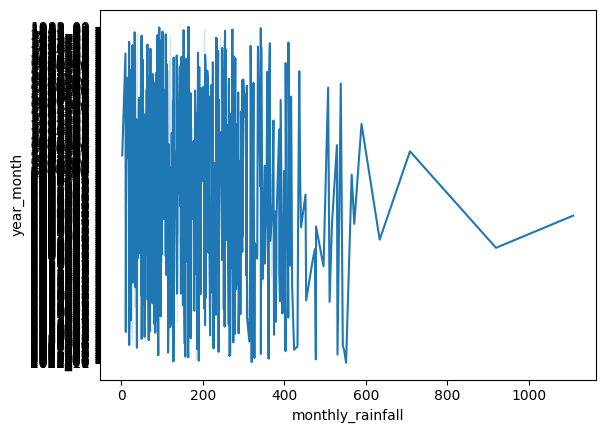

In [5]:
X = pd_rainfall_1982_2022["monthly_rainfall"]
#X = sm.add_constant(X)
y = pd_rainfall_1982_2022["year_month"]
sns.lineplot(x=X, y=y)

In [6]:
pd_temperature_1982_2022 = pd.read_excel(df, "temperature", skiprows=[0], nrows=82)
pd_temperature_1982_2022["Year"] = pd_temperature_1982_2022["Year"].fillna(method="ffill").astype(int).astype("string")
pd_temperature_1982_2022[months] = pd_temperature_1982_2022[months].apply(pd.to_numeric, errors = 'coerce', axis=1).fillna(0)
pd_temperature_1982_2022.tail()


,Year,Level,January,February,March,April,May,June,July,August,September,October,November,December,Annual Mean
77,2020,Min.,24.4,24.9,24.9,25.0,24.7,24.5,24.0,24.6,25.1,25.3,24.3,23.7,24.6
78,2021,Max.,29.3,29.3,29.5,29.9,29.4,29.9,30.1,30.5,31.7,31.4,30.5,29.3,29.6
79,2021,Min.,23.8,24.5,24.4,24.6,24.6,24.1,23.8,24.1,24.5,25.1,24.1,24.3,24.3
80,2022,Max.,29.6,29.2,29.6,29.8,29.7,29.9,30.2,31.9,31.9,31.5,30.7,29.0,30.3
81,2022,Min.,24.2,23.9,24.4,24.9,24.7,24.0,24.3,24.9,25.1,25.0,24.2,23.8,24.5


In [7]:
pd_temperature_1982_2022_morning = pd_temperature_1982_2022[0::2]
pd_temperature_1982_2022_morning.rename(columns={"Year": "year"}, inplace=True)
pd_temperature_1982_2022_morning["year_period"] = pd_temperature_1982_2022_morning["year"]+"_morning_temperature"
pd_temperature_1982_2022_morning = pd_temperature_1982_2022_morning[["year_period"]+months].reset_index(drop=True)
pd_temperature_1982_2022_morning.rename(columns=months_ind, inplace=True)
pd_temperature_1982_2022_morning  = pd_temperature_1982_2022_morning.melt(id_vars=["year_period"])
pd_temperature_1982_2022_morning["year_period"] = pd_temperature_1982_2022_morning["year_period"]+"_"+pd_temperature_1982_2022_morning["variable"]
#pd_temperature_1982_2021_morning  = pd_temperature_1982_2021_morning.melt(id_vars=["year_period"]).rename_axis('index').sort_values(['year_period', 'index'])[["year_period", "value"]].reset_index()
pd_temperature_1982_2022_morning.rename(columns={"value":"total_temperature_morning"}, inplace=True)
pd_temperature_1982_2022_morning = pd_temperature_1982_2022_morning[["year_period", "total_temperature_morning"]]
pd_temperature_1982_2022_morning = pd_temperature_1982_2022_morning.sort_values('year_period').reset_index(drop=True)
pd_temperature_1982_2022_morning.rename(columns={"year_period":"year_period_month"}, inplace=True)
pd_temperature_1982_2022_morning.head()
start_year_index = pd_temperature_1982_2022_morning[pd_temperature_1982_2022_morning["year_period_month"] == "1994_morning_temperature_00"].index.to_list()[0]
pd_temperature_1994_2022_morning = pd_temperature_1982_2022_morning.iloc[start_year_index:].reset_index(drop=True)
pd_temperature_1994_2022_morning.tail()

C:\Users\simeo\AppData\Local\Temp\ipykernel_9528\1478864836.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_temperature_1982_2022_morning.rename(columns={"Year": "year"}, inplace=True)
C:\Users\simeo\AppData\Local\Temp\ipykernel_9528\1478864836.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_temperature_1982_2022_morning["year_period"] = pd_temperature_1982_2022_morning["year"]+"_morning_temperature"


,year_period_month,total_temperature_morning
343,2022_morning_temperature_07,31.9
344,2022_morning_temperature_08,31.9
345,2022_morning_temperature_09,31.5
346,2022_morning_temperature_10,30.7
347,2022_morning_temperature_11,29.0


In [8]:
pd_temperature_1982_2022_afternoon = pd_temperature_1982_2022[0::2]
pd_temperature_1982_2022_afternoon.rename(columns={"Year": "year"}, inplace=True)
pd_temperature_1982_2022_afternoon["year_period"] = pd_temperature_1982_2022_afternoon["year"]+"_afternoon_temperature"
pd_temperature_1982_2022_afternoon = pd_temperature_1982_2022_afternoon[["year_period"]+months].reset_index(drop=True)
pd_temperature_1982_2022_afternoon.rename(columns=months_ind, inplace=True)
pd_temperature_1982_2022_afternoon  = pd_temperature_1982_2022_afternoon.melt(id_vars=["year_period"])
pd_temperature_1982_2022_afternoon["year_period"] = pd_temperature_1982_2022_afternoon["year_period"]+"_"+pd_temperature_1982_2022_afternoon["variable"]
#pd_temperature_1982_2021_afternoon  = pd_temperature_1982_2021_afternoon.melt(id_vars=["year_period"]).rename_axis('index').sort_values(['year_period', 'index'])[["year_period", "value"]].reset_index()
pd_temperature_1982_2022_afternoon.rename(columns={"value":"total_temperature_afternoon"}, inplace=True)
pd_temperature_1982_2022_afternoon = pd_temperature_1982_2022_afternoon[["year_period", "total_temperature_afternoon"]]
pd_temperature_1982_2022_afternoon = pd_temperature_1982_2022_afternoon.sort_values('year_period').reset_index(drop=True)
pd_temperature_1982_2022_afternoon.rename(columns={"year_period":"year_period_month"}, inplace=True)
pd_temperature_1982_2022_afternoon.head()
start_year_index = pd_temperature_1982_2022_afternoon[pd_temperature_1982_2022_afternoon["year_period_month"] == "1994_afternoon_temperature_00"].index.to_list()[0]
pd_temperature_1994_2022_afternoon = pd_temperature_1982_2022_afternoon.iloc[start_year_index:].reset_index(drop=True)
pd_temperature_1994_2022_afternoon.tail()

C:\Users\simeo\AppData\Local\Temp\ipykernel_9528\1034698556.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_temperature_1982_2022_afternoon.rename(columns={"Year": "year"}, inplace=True)
C:\Users\simeo\AppData\Local\Temp\ipykernel_9528\1034698556.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_temperature_1982_2022_afternoon["year_period"] = pd_temperature_1982_2022_afternoon["year"]+"_afternoon_temperature"


,year_period_month,total_temperature_afternoon
343,2022_afternoon_temperature_07,31.9
344,2022_afternoon_temperature_08,31.9
345,2022_afternoon_temperature_09,31.5
346,2022_afternoon_temperature_10,30.7
347,2022_afternoon_temperature_11,29.0


In [9]:
pd_humidity_1982_2022 = pd.read_excel(df, "humidity", skiprows=[0], nrows=82)
pd_humidity_1982_2022["Year"] = pd_humidity_1982_2022["Year"].fillna(method="ffill").astype(int).astype("string")
pd_humidity_1982_2022["Period"] = pd_humidity_1982_2022["Period"].apply(lambda x: str(x).replace("Hours", ""))
pd_humidity_1982_2022[months] = pd_humidity_1982_2022[months].apply(pd.to_numeric, errors = 'coerce', axis=1).fillna(0)
pd_humidity_1982_2022.head()

,Year,Period,January,February,March,April,May,June,July,August,September,October,November,December,Annual Mean
0,1982,08:45,85.0,83.0,87.0,86.0,87.0,86.0,89.0,85.0,79.0,77.0,77.0,81.0,84
1,1982,14:45,71.0,71.0,72.0,70.0,68.0,70.0,67.0,45.0,67.0,62.0,63.0,67.0,68
2,1983,08:45,81.0,80.0,79.0,77.0,88.0,82.0,83.0,83.0,82.0,81.0,76.0,86.0,82
3,1983,14:45,68.0,64.0,65.0,68.0,72.0,70.0,65.0,71.0,70.0,64.0,64.0,75.0,68
4,1984,08:45,86.0,82.0,77.0,74.0,83.0,88.0,89.0,85.0,85.0,83.0,84.0,84.0,83


In [10]:
pd_humidity_1982_2022_morning = pd_humidity_1982_2022[0::2]
pd_humidity_1982_2022_morning.rename(columns={"Year": "year"}, inplace=True)
pd_humidity_1982_2022_morning["year_period"] = pd_humidity_1982_2022_morning["year"]+"_morning_humidity"
pd_humidity_1982_2022_morning = pd_humidity_1982_2022_morning[["year_period"]+months].reset_index(drop=True)
pd_humidity_1982_2022_morning.rename(columns=months_ind, inplace=True)
pd_humidity_1982_2022_morning  = pd_humidity_1982_2022_morning.melt(id_vars=["year_period"])
pd_humidity_1982_2022_morning["year_period"] = pd_humidity_1982_2022_morning["year_period"]+"_"+pd_humidity_1982_2022_morning["variable"]
#pd_humidity_1982_2021_morning  = pd_humidity_1982_2021_morning.melt(id_vars=["year_period"]).rename_axis('index').sort_values(['year_period', 'index'])[["year_period", "value"]].reset_index()
pd_humidity_1982_2022_morning.rename(columns={"value":"total_humidity_morning"}, inplace=True)
pd_humidity_1982_2022_morning = pd_humidity_1982_2022_morning[["year_period", "total_humidity_morning"]]
pd_humidity_1982_2022_morning = pd_humidity_1982_2022_morning.sort_values('year_period').reset_index(drop=True)
pd_humidity_1982_2022_morning.rename(columns={"year_period":"year_period_month"}, inplace=True)
pd_humidity_1982_2022_morning.head()
start_year_index = pd_humidity_1982_2022_morning[pd_humidity_1982_2022_morning["year_period_month"] == "1994_morning_humidity_00"].index.to_list()[0]
pd_humidity_1994_2022_morning = pd_humidity_1982_2022_morning.iloc[start_year_index:].reset_index(drop=True)
pd_humidity_1994_2022_morning.tail()


C:\Users\simeo\AppData\Local\Temp\ipykernel_9528\2185911813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_humidity_1982_2022_morning.rename(columns={"Year": "year"}, inplace=True)
C:\Users\simeo\AppData\Local\Temp\ipykernel_9528\2185911813.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_humidity_1982_2022_morning["year_period"] = pd_humidity_1982_2022_morning["year"]+"_morning_humidity"


,year_period_month,total_humidity_morning
343,2022_morning_humidity_07,86.0
344,2022_morning_humidity_08,85.0
345,2022_morning_humidity_09,86.0
346,2022_morning_humidity_10,89.0
347,2022_morning_humidity_11,90.0


In [11]:
pd_humidity_1982_2022_afternoon = pd_humidity_1982_2022[1::2]
pd_humidity_1982_2022_afternoon.rename(columns={"Year": "year"}, inplace=True)
pd_humidity_1982_2022_afternoon["year_period"] = pd_humidity_1982_2022_afternoon["year"]+"_afternoon_humidity"
pd_humidity_1982_2022_afternoon = pd_humidity_1982_2022_afternoon[["year_period"]+months].reset_index(drop=True)
pd_humidity_1982_2022_afternoon.rename(columns=months_ind, inplace=True)
pd_humidity_1982_2022_afternoon  = pd_humidity_1982_2022_afternoon.melt(id_vars=["year_period"])
pd_humidity_1982_2022_afternoon["year_period"] = pd_humidity_1982_2022_afternoon["year_period"]+"_"+pd_humidity_1982_2022_afternoon["variable"]
#pd_humidity_1982_2021_afternoon  = pd_humidity_1982_2021_afternoon.melt(id_vars=["year_period"]).rename_axis('index').sort_values(['year_period', 'index'])[["year_period", "value"]].reset_index()
pd_humidity_1982_2022_afternoon.rename(columns={"value":"total_humidity_afternoon"}, inplace=True)
pd_humidity_1982_2022_afternoon = pd_humidity_1982_2022_afternoon[["year_period", "total_humidity_afternoon"]]
pd_humidity_1982_2022_afternoon = pd_humidity_1982_2022_afternoon.sort_values('year_period').reset_index(drop=True)
pd_humidity_1982_2022_afternoon.rename(columns={"year_period":"year_period_month"}, inplace=True)
start_year_index = pd_humidity_1982_2022_afternoon[pd_humidity_1982_2022_afternoon["year_period_month"] == "1994_afternoon_humidity_00"].index.to_list()[0]
pd_humidity_1994_2022_afternoon = pd_humidity_1982_2022_afternoon.iloc[start_year_index:].reset_index(drop=True)
#pd_humidity_1994_2021_afternoon
pd_humidity_1994_2022_afternoon.tail()

C:\Users\simeo\AppData\Local\Temp\ipykernel_9528\2937800567.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_humidity_1982_2022_afternoon.rename(columns={"Year": "year"}, inplace=True)
C:\Users\simeo\AppData\Local\Temp\ipykernel_9528\2937800567.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_humidity_1982_2022_afternoon["year_period"] = pd_humidity_1982_2022_afternoon["year"]+"_afternoon_humidity"


,year_period_month,total_humidity_afternoon
343,2022_afternoon_humidity_07,71.0
344,2022_afternoon_humidity_08,72.0
345,2022_afternoon_humidity_09,75.0
346,2022_afternoon_humidity_10,79.0
347,2022_afternoon_humidity_11,82.0


In [12]:
#number_of_rows = (2022-1982)+1
number_of_rows = (end_year-start_year)+1
temp_months = list(list(range(12)))*(number_of_rows)
months_df = pd.DataFrame()
months_df["month_index"] = pd.DataFrame(temp_months)
months_df[months] = 0
for index, row in months_df.iterrows():
    if row["month_index"] == 0:
        row["January"] = 1
    elif row["month_index"] == 1:
        row["February"] = 1
    elif row["month_index"] == 2:
        row["March"] = 1
    elif row["month_index"] == 3:
        row["April"] = 1
    elif row["month_index"] == 4:
        row["May"] = 1
    elif row["month_index"] == 5:
        row["June"] = 1
    elif row["month_index"] == 6:
        row["July"] = 1
    elif row["month_index"] == 7:
        row["August"] = 1
    elif row["month_index"] == 8:
        row["September"] = 1
    elif row["month_index"] == 9:
        row["October"] = 1
    elif row["month_index"] == 10:
        row["November"] = 1
    elif row["month_index"] == 11:
        row["December"] = 1
months_df.shape

(348, 13)

In [13]:
pd_humidity_1994_2022_mean_array = []
for i in range(number_of_rows*12):
    pd_humidity_1994_2022_mean_array.append((pd_humidity_1994_2022_morning.loc[i]["total_humidity_morning"]+pd_humidity_1994_2022_afternoon.loc[i]["total_humidity_afternoon"])/2)
pd_humidity_1994_2022_mean = pd.DataFrame()
pd_humidity_1994_2022_mean["humidity_monthly_mean"] = pd_humidity_1994_2022_mean_array
pd_humidity_1994_2022_mean.shape
#len(pd_humidity_1982_2021_mean_array)

(348, 1)

In [14]:
pd_temperature_1994_2022_mean_array = []
for i in range(number_of_rows*12):
    pd_temperature_1994_2022_mean_array.append((pd_temperature_1982_2022_morning.loc[i]["total_temperature_morning"]+pd_temperature_1994_2022_afternoon.loc[i]["total_temperature_afternoon"])/2)
pd_temperature_1994_2022_mean = pd.DataFrame()
pd_temperature_1994_2022_mean["temperature_monthly_mean"] = pd_temperature_1994_2022_mean_array
pd_temperature_1994_2022_mean.shape

(348, 1)

In [15]:
humidity = pd.merge(pd_humidity_1994_2022_morning, pd_humidity_1994_2022_afternoon, left_index=True, right_index=True)
temperature= pd.merge(pd_temperature_1994_2022_morning, pd_temperature_1994_2022_afternoon, left_index=True, right_index=True) 
analysis_df = pd.merge(humidity, temperature, left_index=True, right_index=True)
analysis_df = pd.merge(pd_rainfall_1994_2022, analysis_df, left_index=True, right_index=True)
analysis_df = pd.merge(months_df, analysis_df, left_index=True, right_index=True)
analysis_df = pd.merge(pd_humidity_1994_2022_mean, analysis_df, left_index=True, right_index=True)
analysis_df = pd.merge(pd_temperature_1994_2022_mean, analysis_df, left_index=True, right_index=True)
analysis_df = pd.merge(pd_sunshine_1994_2022, analysis_df, left_index=True, right_index=True)

In [16]:
analysis_df.columns

Index(['year_month_x', 'monthly_sunshine', 'temperature_monthly_mean',
       'humidity_monthly_mean', 'month_index', 'January', 'February', 'March',
       'April', 'May', 'June', 'July', 'August', 'September', 'October',
       'November', 'December', 'year_month_y', 'monthly_rainfall',
       'year_period_month_x_x', 'total_humidity_morning',
       'year_period_month_y_x', 'total_humidity_afternoon',
       'year_period_month_x_y', 'total_temperature_morning',
       'year_period_month_y_y', 'total_temperature_afternoon'],
      dtype='object')

In [17]:
#analysis_df.to_csv("analysis_df.csv")

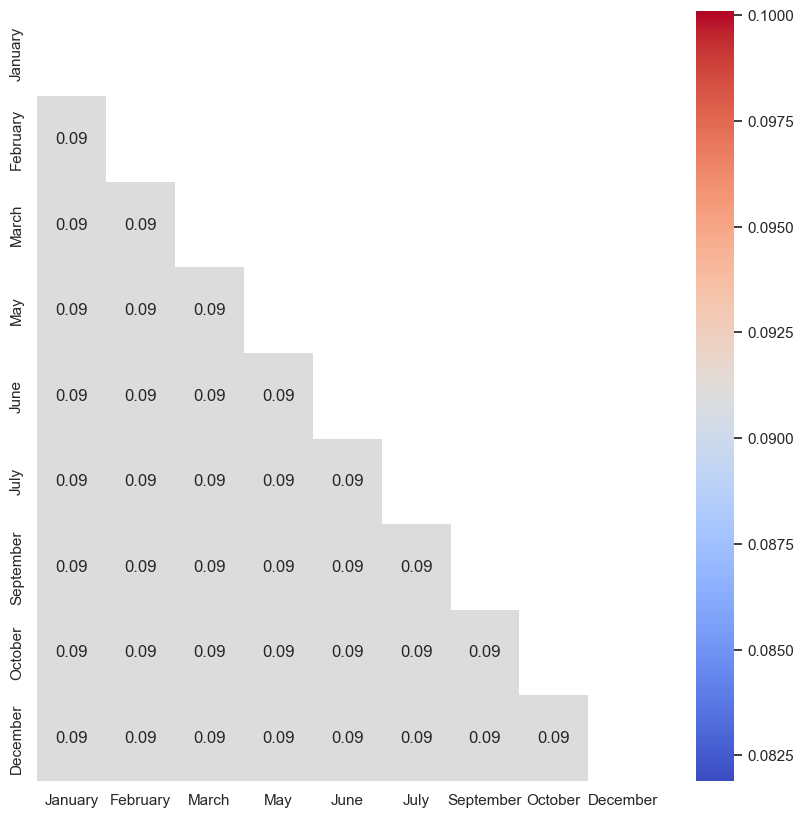

In [18]:
x_columns = [
    'January',
    'February',
    'March',
    #'April',
    'May',
    'June',
    'July', 
    #'August', 
    'September',
    'October',
    #'November', 
    'December',
    #'total_humidity_morning',
    #'total_humidity_afternoon',
    #'total_temperature_morning',
    #'total_temperature_afternoon',
    #'temperature_monthly_mean',
    #'humidity_monthly_mean',
    #"monthly_sunshine"
]
plt.figure(figsize=(10,10))
sns.set_theme(style="white")
analysis_df_corr = analysis_df[x_columns].corr().applymap(lambda x: abs(round(x, 3)))
#analysis_df_corr = analysis_df[x_columns].corr().applymap(lambda x: round(x, 3))
mask = np.triu(analysis_df_corr)
heatmap = sns.heatmap(analysis_df_corr, mask=mask, annot=True, cmap="coolwarm", fmt='.1g')

In [19]:
#plt.figure(figsize=(16,8))
#sns.pairplot(analysis_df[["monthly_sunshine", "humidity_monthly_mean", "temperature_monthly_mean"]], kind="reg")

In [20]:
X = analysis_df[x_columns]
X = sm.add_constant(X)
y = analysis_df["monthly_rainfall"]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       monthly_rainfall   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     16.17
Date:                Sat, 22 Apr 2023   Prob (F-statistic):           4.58e-22
Time:                        11:24:55   Log-Likelihood:                -2177.9
No. Observations:                 348   AIC:                             4376.
Df Residuals:                     338   BIC:                             4414.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        169.8851     13.752     12.354      0.000     142.835     196.935
January       56.8839     27.503      2.068      0.039       2.785     110.983
February     -24.7920     27.503     -0.901      0.368     -78.891      29.307
March        -46.3402     27.503     -1.685      0.093    -100.439       7.759
May          132.3977     27.503      4.814      0.000      78.298     186.497
June         150.2460     27.503      5.463      0.000      96.147     204.345
July         130.3391     27.503      4.739      0.000      76.240     184.438
September    -72.8920     27.503     -2.650      0.008    -126.991     -18.793
October      -90.1299     27.503     -3.277      0.001    -144.229     -36.031
December     131.5287     27.503      4.782      0.000      77.430     185.628
==============================================================================
Omnibus:                      173.754   Durbin-Watson:                   1.658
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1331.932
Skew:                           1.943   Prob(JB):                    5.95e-290
Kurtosis:                      11.761   Cond. No.                         7.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""